In [28]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [29]:
# Load the California dataset
data = fetch_california_housing()
X, y = data.data, data.target

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Machine': SVR(),  # SVM for regression
    'Random Forest': RandomForestRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'XGBoost': xgb.XGBRegressor()
}


In [32]:
# Initialize lists to store MSE, RMSE, and R-squared values
mse_results = []
rmse_results = []
r2_results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)  # Computing MSE
    rmse = np.sqrt(mse)  # Computing RMSE from MSE
    r2 = r2_score(y_test, y_pred)  # Computing R-squared
    mse_results.append(mse)
    rmse_results.append(rmse)
    r2_results.append(r2)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947


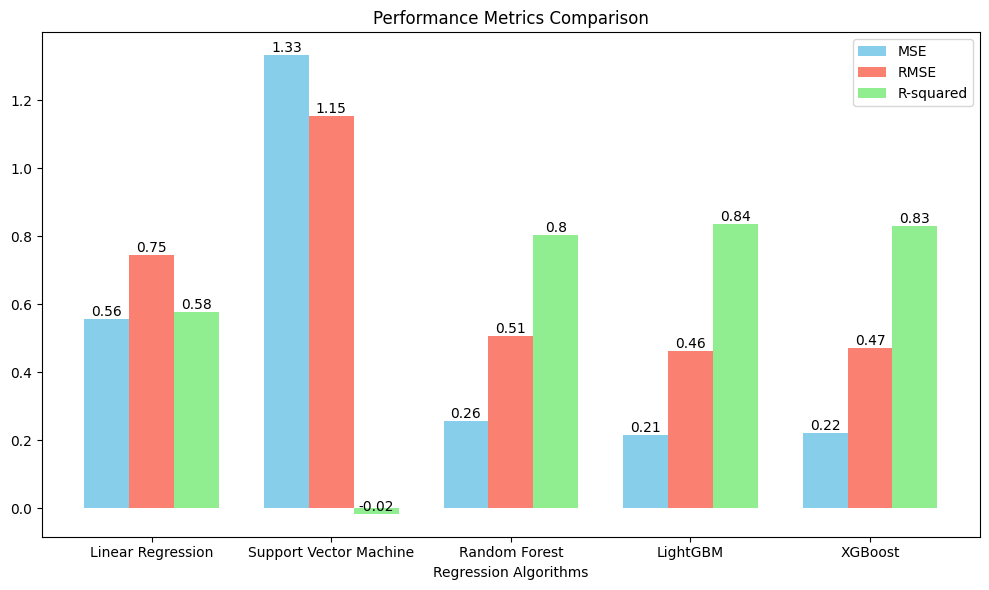

In [34]:
# Plotting MSE, RMSE, and R-squared in one chart
plt.figure(figsize=(10, 6))

barWidth = 0.25
bar1 = range(len(models))
bar2 = [x + barWidth for x in bar1]
bar3 = [x + barWidth for x in bar2]

bars = plt.bar(bar1, mse_results, color='skyblue', width=barWidth, label='MSE')
for bar, mse in zip(bars, mse_results):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(mse, 2), ha='center', va='bottom')

bars = plt.bar(bar2, rmse_results, color='salmon', width=barWidth, label='RMSE')
for bar, rmse in zip(bars, rmse_results):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(rmse, 2), ha='center', va='bottom')

bars = plt.bar(bar3, r2_results, color='lightgreen', width=barWidth, label='R-squared')
for bar, r2 in zip(bars, r2_results):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(r2, 2), ha='center', va='bottom')

plt.xlabel('Regression Algorithms')
plt.xticks([r + barWidth for r in range(len(models))], models.keys())
plt.title('Performance Metrics Comparison')
plt.legend()
plt.tight_layout()
plt.show()